In [83]:
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
from keras.optimizers import Adadelta
from __future__ import division
import numpy as np

import h5py as h5py

import matplotlib.pyplot as plt


In [81]:
#Parameters for the training updates
img_width, img_height = 400, 250
nb_train_samples = 100
nb_validation_samples = 20 
batch_size = 2
epochs = 50

label_mode="binary"

train_data_dir="../PICS/train"
validation_data_dir="../PICS/val"

### Inception v3 model setup

In [7]:
base_model = InceptionV3(weights='imagenet',include_top=False,input_shape = (img_height, img_width, 3))

87875584/87910968 [============================>.] - ETA: 0s

In [ ]:
base_model.summary() #Prints the architecture of the model

In [66]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
# We add a fully-connected layer
x = Dense(1024, activation='relu')(x)
# and a logistic layer 
predictions = Dense(1, activation='sigmoid')(x)

model= Model(inputs=base_model.input, outputs=predictions)

#We freeze the model expected the added layers
for layer in base_model.layers:
    layer.trainable = False
    
#Compilation of the model :

#We use ada-delta
opt=Adadelta(lr=1.0, rho=0.95, epsilon=1e-08, decay=0.0)
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])


### Data Generation and feed to NN

In [77]:
train_datagen = ImageDataGenerator(
preprocessing_function=preprocess_input,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=10)

test_datagen = ImageDataGenerator(
preprocessing_function=preprocess_input,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.1,
width_shift_range = 0.1,
height_shift_range=0.1,
rotation_range=10)

print("Training Set : ")
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = label_mode)

print("Validation Set : ")
validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = label_mode)









Training Set : 
Found 2 images belonging to 2 classes.
Validation Set : 
Found 2 images belonging to 2 classes.


### Test of the DataGenerator


Found 2 images belonging to 2 classes.
(2, 250, 400, 3)


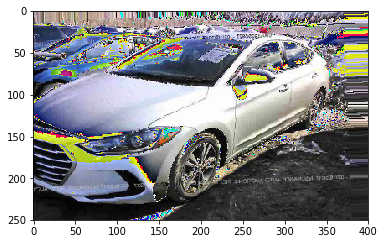

[[ 0.  1.]
 [ 1.  0.]]


In [75]:
for X_batch, y_batch in train_datagen.flow_from_directory(train_data_dir,target_size = (img_height, img_width),batch_size = 2, class_mode = "categorical"):
    print(X_batch.shape)
    #print(X_batch)
    plt.imshow(X_batch[0,:,:,:])
    # show the plot
    plt.show()
    print(y_batch)
    break


### Configure Callbacks and train model

In [82]:
# Model Callbacks  

#Saved every 5 epochs in this case
save_period=5
checkpoint = ModelCheckpoint("Inceptionv3_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=save_period)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Training :
model.fit_generator(
train_generator,
steps_per_epoch = nb_train_samples /btach_size,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])

/Users/edwarddebrouwer/ENV/lib/python2.7/site-packages/ipykernel_launcher.py:16: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., steps_per_epoch=33, epochs=50, callbacks=[<keras.ca..., validation_steps=20)`
  app.launch_new_instance()


Epoch 1/50
33/33 [==============================] - 212s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.9951 - val_acc: 0.5000
Epoch 2/50
33/33 [==============================] - 202s - loss: 0.0034 - acc: 1.0000 - val_loss: 0.6144 - val_acc: 0.6000
Epoch 3/50
33/33 [==============================] - 218s - loss: 0.0012 - acc: 1.0000 - val_loss: 0.3477 - val_acc: 0.8000
Epoch 4/50
33/33 [==============================] - 240s - loss: 5.7056e-04 - acc: 1.0000 - val_loss: 0.1261 - val_acc: 0.9000
Epoch 5/50
31/33 [===========================>..] - ETA: 11s - loss: 4.4919e-04 - acc: 1.0000

KeyboardInterrupt: 

In [ ]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

img_width, img_height = 150, 150
train_data_dir = "data/train"
validation_data_dir = "data/val"
nb_train_samples = 4125
nb_validation_samples = 466 
batch_size = 16
epochs = 50

model = applications.inception_v3(weights = "imagenet", include_top=False, input_shape = (img_width, img_height, 3))

"""
Layer (type)                 Output Shape              Param #   
=================================================================
input_1 (InputLayer)         (None, 256, 256, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 64, 64, 256)       295168    
_________________________________________________________________
block3_conv2 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv3 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_conv4 (Conv2D)        (None, 64, 64, 256)       590080    
_________________________________________________________________
block3_pool (MaxPooling2D)   (None, 32, 32, 256)       0         
_________________________________________________________________
block4_conv1 (Conv2D)        (None, 32, 32, 512)       1180160   
_________________________________________________________________
block4_conv2 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv3 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_conv4 (Conv2D)        (None, 32, 32, 512)       2359808   
_________________________________________________________________
block4_pool (MaxPooling2D)   (None, 16, 16, 512)       0         
_________________________________________________________________
block5_conv1 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv2 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv3 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_conv4 (Conv2D)        (None, 16, 16, 512)       2359808   
_________________________________________________________________
block5_pool (MaxPooling2D)   (None, 8, 8, 512)         0         
=================================================================
Total params: 20,024,384.0
Trainable params: 20,024,384.0
Non-trainable params: 0.0
"""

# Freeze the layers which you don't want to train. Here I am freezing the first 5 layers.
for layer in model.layers[:5]:
    layer.trainable = False

#Adding custom Layers 
x = model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(16, activation="softmax")(x)

# creating the final model 
model_final = Model(input = model.input, output = predictions)

# compile the model 
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

# Initiate the train and test generators with data Augumentation 
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range=0.3,
rotation_range=30)

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

# Save the model according to the conditions  
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')


# Train the model
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
epochs = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples,
callbacks = [checkpoint, early])
